# Homework_2023_05_22 pytorch卷积神经网络
教师：胡俊峰

助教：朱成轩 李一飞

本次作业总分为10分

## 第零部分，请认真阅读代码，理解代码的功能

### 0.1 创建变量
pytorch创建变量的语法与numpy有许多相似之处。下面列举了pytorch创建变量的一些常见用法：

In [34]:
import torch
import numpy as np

# 创建一个张量（tensor）
x = torch.tensor([1, 2, 3, 4])
print("x:", x)

# 创建一个矩阵（matrix）
y = torch.tensor([[1, 2], [3, 4]])
print("y:", y)

# 创建一个全零的张量
z = torch.zeros((2, 3))
print("z:", z)

# 创建一个随机初始化的张量
w = torch.randn((3, 3))
print("w:", w)

# pytorch tensor与numpy array的相互转换
numpy_array = np.array([1, 2, 3, 4, 5])

# 将NumPy数组转换为PyTorch张量
torch_tensor = torch.from_numpy(numpy_array)
print(torch_tensor)

# 将PyTorch张量转换为NumPy数组
numpy_array = torch_tensor.numpy()
print(numpy_array)

x: tensor([1, 2, 3, 4])
y: tensor([[1, 2],
        [3, 4]])
z: tensor([[0., 0., 0.],
        [0., 0., 0.]])
w: tensor([[-2.0865,  1.5281,  0.9806],
        [ 0.8245, -0.4244, -0.0520],
        [ 0.1420,  0.1017,  1.2484]])
tensor([1, 2, 3, 4, 5], dtype=torch.int32)
[1 2 3 4 5]


### 0.2 算术运算


In [35]:
# 创建一个服从标准正态分布的3*4的张量A
A = torch.randn((3, 4))
print("A:", A)

# 创建一个服从标准正态分布的2*6的张量B
B = torch.randn((2, 6))
print("B:", B)

# 使用view操作将B的形状也转换成3*4，计算A+B和A*B^T（矩阵乘法）
B = B.view(3, 4)
print("A+B:", A + B)
print("A*B^T:", A.matmul(B.t()))

# 取出矩阵A的所有大于0的值，并按照行的顺序排列成一个一维的张量C。
# 例如：[[0, 0.1, 0.2], [-0.3, 0.4, -0.5]]需要转换成[0.1, 0.2, 0.4]
C = A[A > 0]
print("C:", C)

# 将C的每个元素平方，得到D。计算D的平均值mean(D)，并求出mean(D)对A的梯度
D = C ** 2
D = D.clone().detach().requires_grad_(True)  # 需指定requires_grad=True，否则无法求梯度
print("D:", D)
print("mean(D):", D.mean())
D.mean().backward()

print("A.grad:", A.grad)

# 将A中所有大于零的数置为零并输出
A[A > 0] = 0
print("A:", A)

A: tensor([[ 0.3689, -1.0130, -1.1515,  1.1375],
        [-0.7093, -1.1641,  1.1042, -0.9005],
        [ 0.9489, -1.0131,  0.4080, -1.8650]])
B: tensor([[-1.3979, -0.1961,  0.3685, -1.0993, -2.1444, -0.1082],
        [-1.0340, -1.5203,  0.4864,  0.1175,  0.5965, -0.7286]])
A+B: tensor([[-1.0290, -1.2091, -0.7830,  0.0382],
        [-2.8537, -1.2723,  0.0702, -2.4208],
        [ 1.4353, -0.8956,  1.0045, -2.5936]])
A*B^T: tensor([[-1.9918, -1.2203, -1.4551],
        [ 2.6167,  1.8743,  0.8330],
        [ 1.0728,  0.4880,  1.9447]])
C: tensor([0.3689, 1.1375, 1.1042, 0.9489, 0.4080])
D: tensor([0.1361, 1.2940, 1.2192, 0.9005, 0.1665], requires_grad=True)
mean(D): tensor(0.7432, grad_fn=<MeanBackward0>)
A.grad: None
A: tensor([[ 0.0000, -1.0130, -1.1515,  0.0000],
        [-0.7093, -1.1641,  0.0000, -0.9005],
        [ 0.0000, -1.0131,  0.0000, -1.8650]])


### 0.3 构建神经网络模型
pytorch自定义神经网络类需要继承nn.Module模块。主要包含两部分：一部分在__init__()函数中定义网络结构（即包含哪些层）；另一部分在forward()函数中定义输入数据被每一层的计算顺序。pytorch库会根据forward()中定义的计算顺序构建计算图，并在后续模型训练时自动调用backward()函数计算梯度和loss。下面给出了一个简单的代码例子：

In [36]:
import torch
import torch.nn as nn

# 定义一个简单的神经网络
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 创建网络实例
net = SimpleNet()
print(net)

SimpleNet(
  (fc1): Linear(in_features=10, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=2, bias=True)
  (relu): ReLU()
)


### 0.4 完整的神经网络训练流程

使用神经网络解决一个数据集上的具体任务，主要包含数据预处理与加载、网络定义、训练、评测等步骤。

对于本次作业的CNN主题，pytorch官网也给出了在MNIST图像数据集上训练CNN分类器的代码，包含数据处理、网络定义、训练、评测等全流程，大家可以动手学习参考。链接如下：
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [37]:
import torch
from torch import nn,optim,flatten
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import math
import numpy as np
from matplotlib import pyplot as plt

## 第一部分：卷积神经网络

本节我们将完成关于卷积神经网络的练习。练习分为两部分，首先是简单地手写卷积来完成边缘提取任务，该部分属于传统的图像识别范畴。然后，我们将实现一个卷积神经网络来完成对FashionMINST数据集进行分类的工作。

### 1.1 卷积边缘提取（阅读即可）

边缘的特点是像素值在这里会发生跃迁，因此可以通过计算梯度的方式来判定边缘的位置。我们可以利用卷积和特定的算子来计算相邻像素的变化，常用的算子包括Sobel算子、Prewitt算子、Laplacian算子等，同学们也可以自行设计算子来对下面的图片进行边缘检测。
请使用填充保证输入、输出的图像尺寸相等

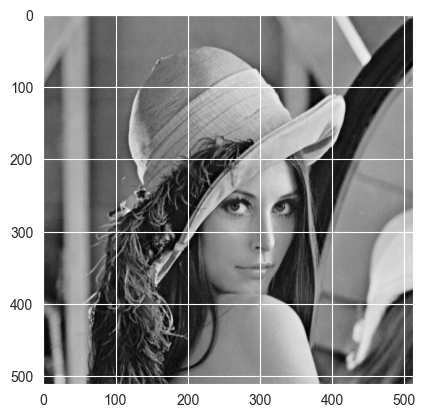

In [38]:
import cv2
lena = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(lena,cmap ='gray')
plt.show()

首先我们设计卷积核，注意这里只进行卷积操作，因此不需要保存梯度，然后利用该卷积核进行卷积即可。

关于pytorch的权重初始化，可以参考[这里](https://blog.csdn.net/shanglianlm/article/details/85165523)，不过本次任务实际上我们只需要对weight赋值即可。请注意对nn.Module的weight赋值时需要将tensor转化为nn.Parameter类，否则会报错。同时我们需要对图像的shape进行略微的修改以适应Conv2d的要求

另外卷积后的结果可能会超出灰度图的范围，为了更好的显示效果可能需要后续处理。

In [39]:
class kernel(nn.Module):
    def __init__(self):
        super(kernel,self).__init__()
        # TODO，设计卷积核的格式并将卷积核的权重初始化为指定的内容
        self.conv = nn.Conv2d(1,1,3,1,1)
        self.conv.weight = nn.Parameter(torch.Tensor([[[[0,-1,0], [-1,4,-1],[0,-1,0]]]]), requires_grad=False)
    def forward(self,x):
        # TODO
        return self.conv(x)

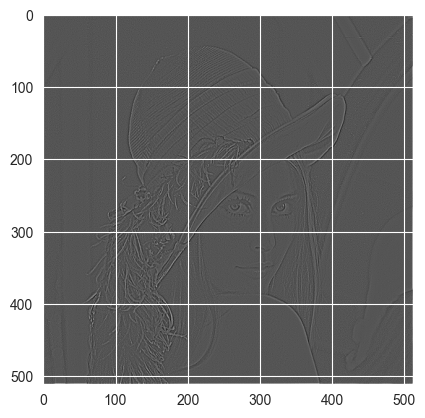

In [40]:
def convolution(image, kernel):
    # TODO
    image = ToTensor()(image).unsqueeze(0)
    res = kernel(image)
    return res.squeeze(0).permute(1,2,0).detach().numpy()

conv_kernel = kernel()
res = convolution(lena,conv_kernel)
plt.imshow(res,'gray')

### 1.2 基于卷积神经网络的图像分类（10分）
本节我们将在FashionMINST数据集上完成简单的图像分类任务，对于网络的设计和最终的分类成绩本次作业没有确切的要求，不过如果稍微调一下参的话取得80%+的正确率应该不算难。

In [41]:
#数据下载，这里可以直接下现成的Dataset，如果同学们想更进一步学习的话应该了解torch.utils.data.Dataset类的写法
training_data = datasets.FashionMNIST(
    root="./", train=True, download=True, transform=ToTensor())
test_data = datasets.FashionMNIST(
    root="./", train=False, download=True, transform=ToTensor())

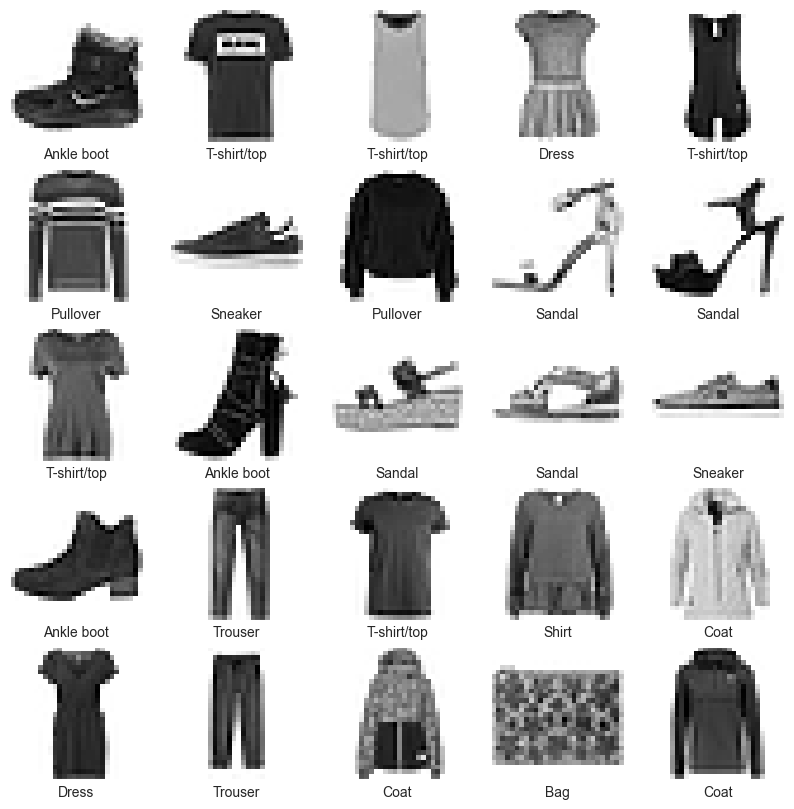

In [42]:
# 进行简单的可视化
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_data[i][0].squeeze(0), cmap=plt.cm.binary)
    plt.xlabel(labels[training_data[i][1]])
plt.show()


In [43]:
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

In [44]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # 自行设计神经网络结构（2分）
        # TODO
        self.convs = nn.Conv2d(1,1,3,1,1)
        self.fc = nn.Linear(28*28,10)

        return
    def forward(self, x):
        # TODO
        x = self.convs(x)
        x = x.view(-1,28*28)
        x = self.fc(x)

        return x

In [45]:
model = NeuralNetwork()
optimizer = optim.Adam(model.parameters())

In [46]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = 64 * len(dataloader)
    for batch, (image, label) in enumerate(dataloader):
        # TODO，训练过程（4分）
        pred = model(image)
        loss = loss_fn(pred, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 100 == 0:
            print("{} / {} , loss: {:.6f}".format(batch*len(label), size, loss.item()))
    return

def test_loop(dataloader, model, loss_fn):
    correct = 0
    with torch.no_grad():
        for image, label in dataloader:
            # TODO，测试过程（4分）
            pred = model(image)
            correct += (pred.argmax(1) == label).type(torch.float).sum().item() / len(label)
        correct /= len(dataloader)
        correct *= 100
        print("Accuracy: {:.2f}%" .format(correct))
    return

epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, nn.CrossEntropyLoss(), optimizer)
    test_loop(test_dataloader, model, nn.CrossEntropyLoss())
print("Done!")

Epoch 1
-------------------------------
0 / 60032 , loss: 2.303466
6400 / 60032 , loss: 0.827413
12800 / 60032 , loss: 0.457164
19200 / 60032 , loss: 0.685104
25600 / 60032 , loss: 0.551162
32000 / 60032 , loss: 0.569255
38400 / 60032 , loss: 0.499290
44800 / 60032 , loss: 0.683336
51200 / 60032 , loss: 0.673206
57600 / 60032 , loss: 0.467345
Accuracy: 82.02%
Epoch 2
-------------------------------
0 / 60032 , loss: 0.370955
6400 / 60032 , loss: 0.508753
12800 / 60032 , loss: 0.351205
19200 / 60032 , loss: 0.562297
25600 / 60032 , loss: 0.464206
32000 / 60032 , loss: 0.500447
38400 / 60032 , loss: 0.428342
44800 / 60032 , loss: 0.662704
51200 / 60032 , loss: 0.627800
57600 / 60032 , loss: 0.436927
Accuracy: 82.99%
Epoch 3
-------------------------------
0 / 60032 , loss: 0.320421
6400 / 60032 , loss: 0.469805
12800 / 60032 , loss: 0.325979
19200 / 60032 , loss: 0.526416
25600 / 60032 , loss: 0.426529
32000 / 60032 , loss: 0.480353
38400 / 60032 , loss: 0.401825
44800 / 60032 , loss: 0.